# Evaluation Project Phase 1 ( HR Analytics Project ) - Understanding the Attrition in HR

# By :- JIGYASA SONI

# Batch DS2309

# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.



How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Note: You can find the dataset in the link below.

Downlaod Files:

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

#  . Importing require library for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) 
df.head()

No of Rows: 1470
No of Columns: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

# Comment:-

 . In this HR dataset we have 1470 rows and 35 columns.
    
 . Non-null count is same for all Columns, so it seem that it contain No missing value. Still we need to perform Data integrity Check for null values in form of "-","NA" , any duplicate entry or error in Data.

 . Out of 35 we have 9 features with Object datatypes and rest are int64 types
    
 . Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.

 . Here We have Target Variable 'Attrition'.
    

### . These Ordinal features come with the following label encoding:

##### Education: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'
EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'
JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'
PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'
RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'

## Statistical Analysis

### Before Going for Statistical exploration of data, first check integrity of data & Missing value

## Data Integrity Check

#### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [7]:
df.duplicated().sum()

0

## Missing Value Check

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

## Comment:-

Luckily for us, there is no missing data! this will make it easier to work with the dataset.

Dataset doesnot contain Any duplicate entry, Missing Values.

#### So, Yes To Go !!!

## Statistical Matrix

<Axes: >

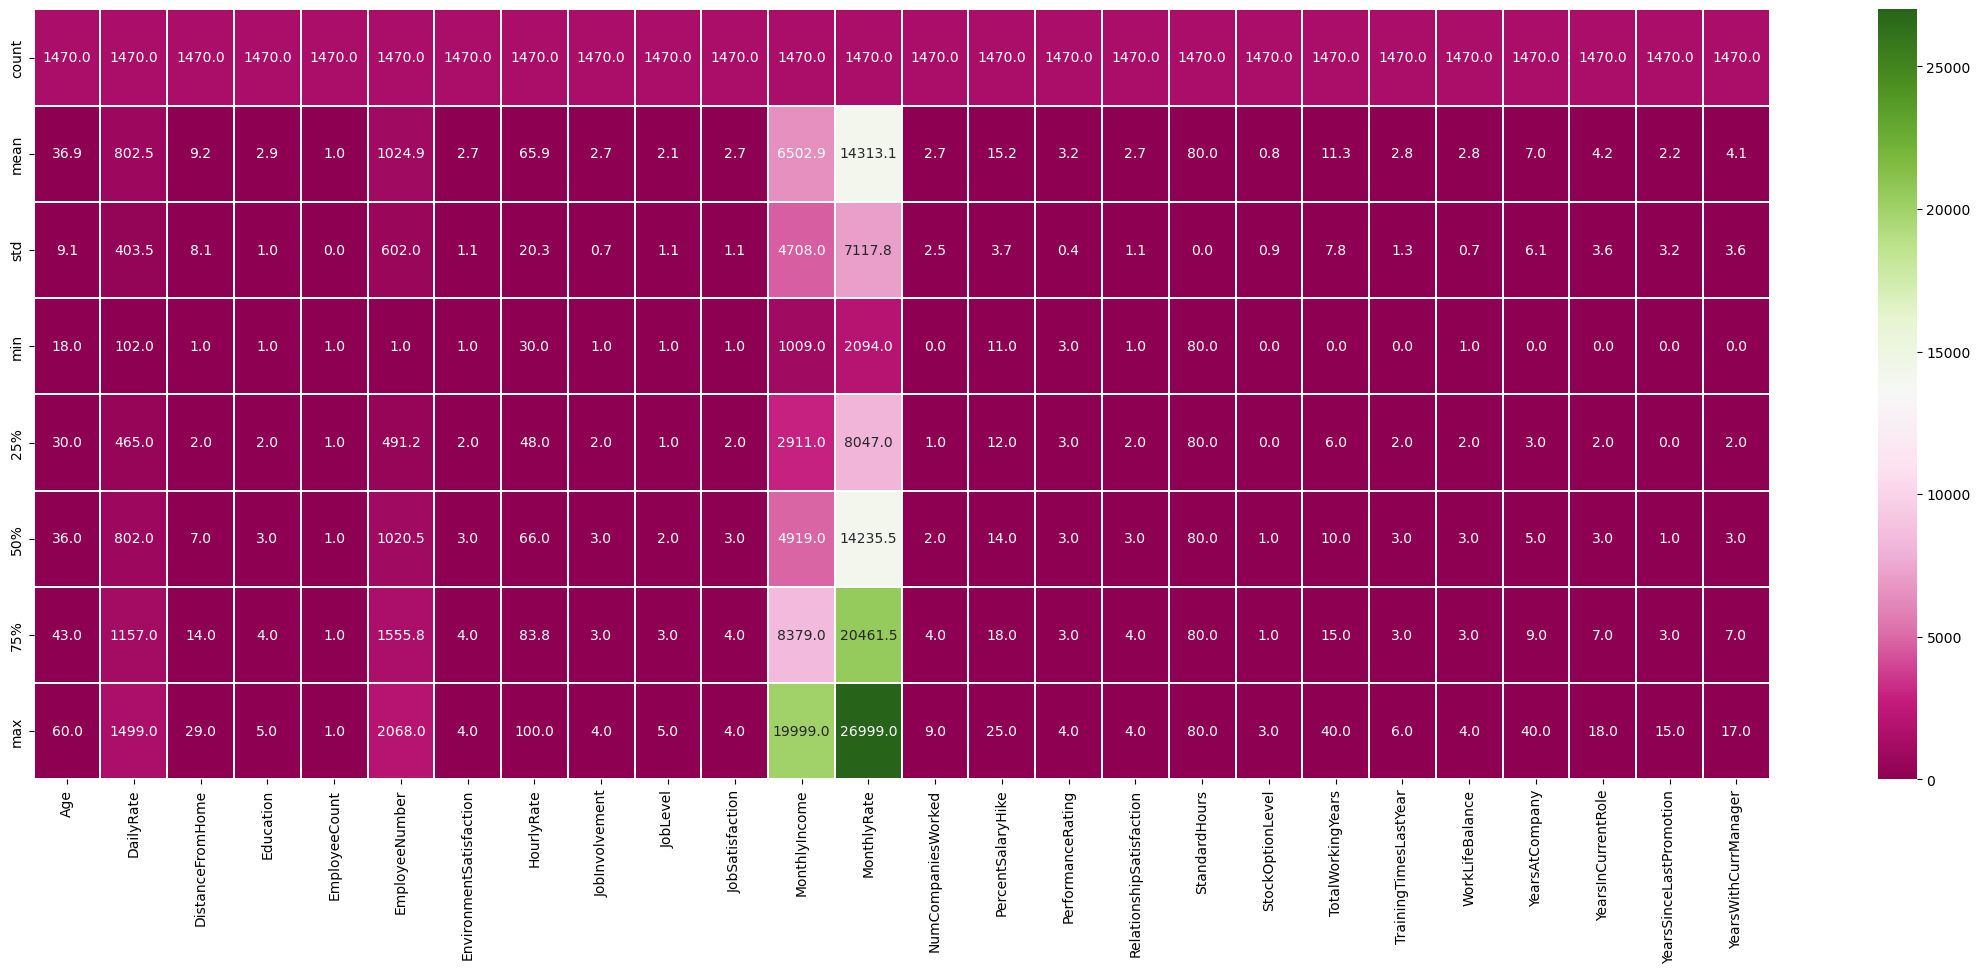

In [9]:
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [10]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


## Comment:-

 . Minimum Empolyee Age is 18 and Maximum age of employee 60.
    
 . Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.

 . On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'.This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.
    
 . 50% of Employees has worked atleast 2 companies previously.

 . For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.
    
 . By looking at Mean and Median we see that some of the features are skew in nature.

 . For ordinal features statstical terminology of mean, median, std deviation doesnot make sense.
    
 . StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.


# 
    . Lets do some Statistical Analysis. Start with target Variable.
    

In [11]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

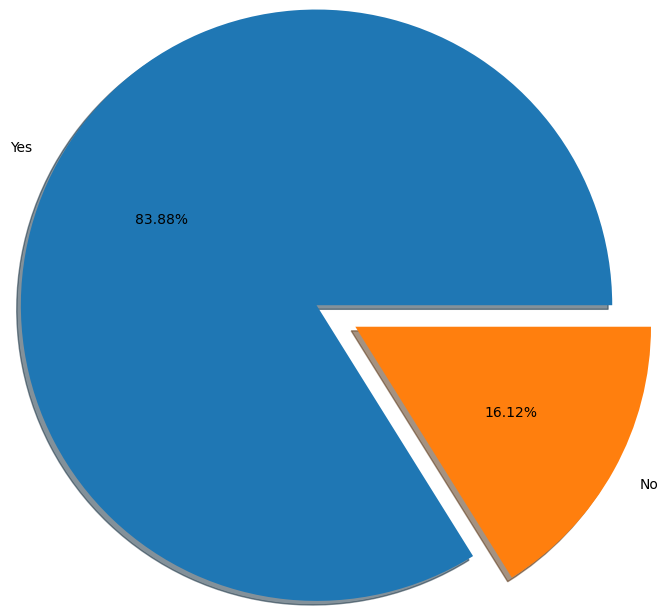

In [12]:
labels='Yes','No',
fig,ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels= labels,radius=2, autopct= '%2.2f%%', explode=[0.1,0.2], shadow=True)
plt.show()

# Comment:-

 . 83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization     making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.
    
    

## Before arrive at key questions which need to answer about HR Attrition, let try to gain some insight about individual features like distribution of different subcategories, different insight about Human Resource in company like education,job level, working domain.

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [13]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
         'Gender', 'JobRole',  'Over18', 'OverTime']
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
Over18
Over18
Y    1470
Name: count, dtype: int64
O

In [14]:
if 'MaritalStatus' in df.columns:
    print(df['MaritalStatus'].value_counts())
    print("="*100)
else:
    print("Column 'MaritalStatus' not found in the DataFrame.")


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


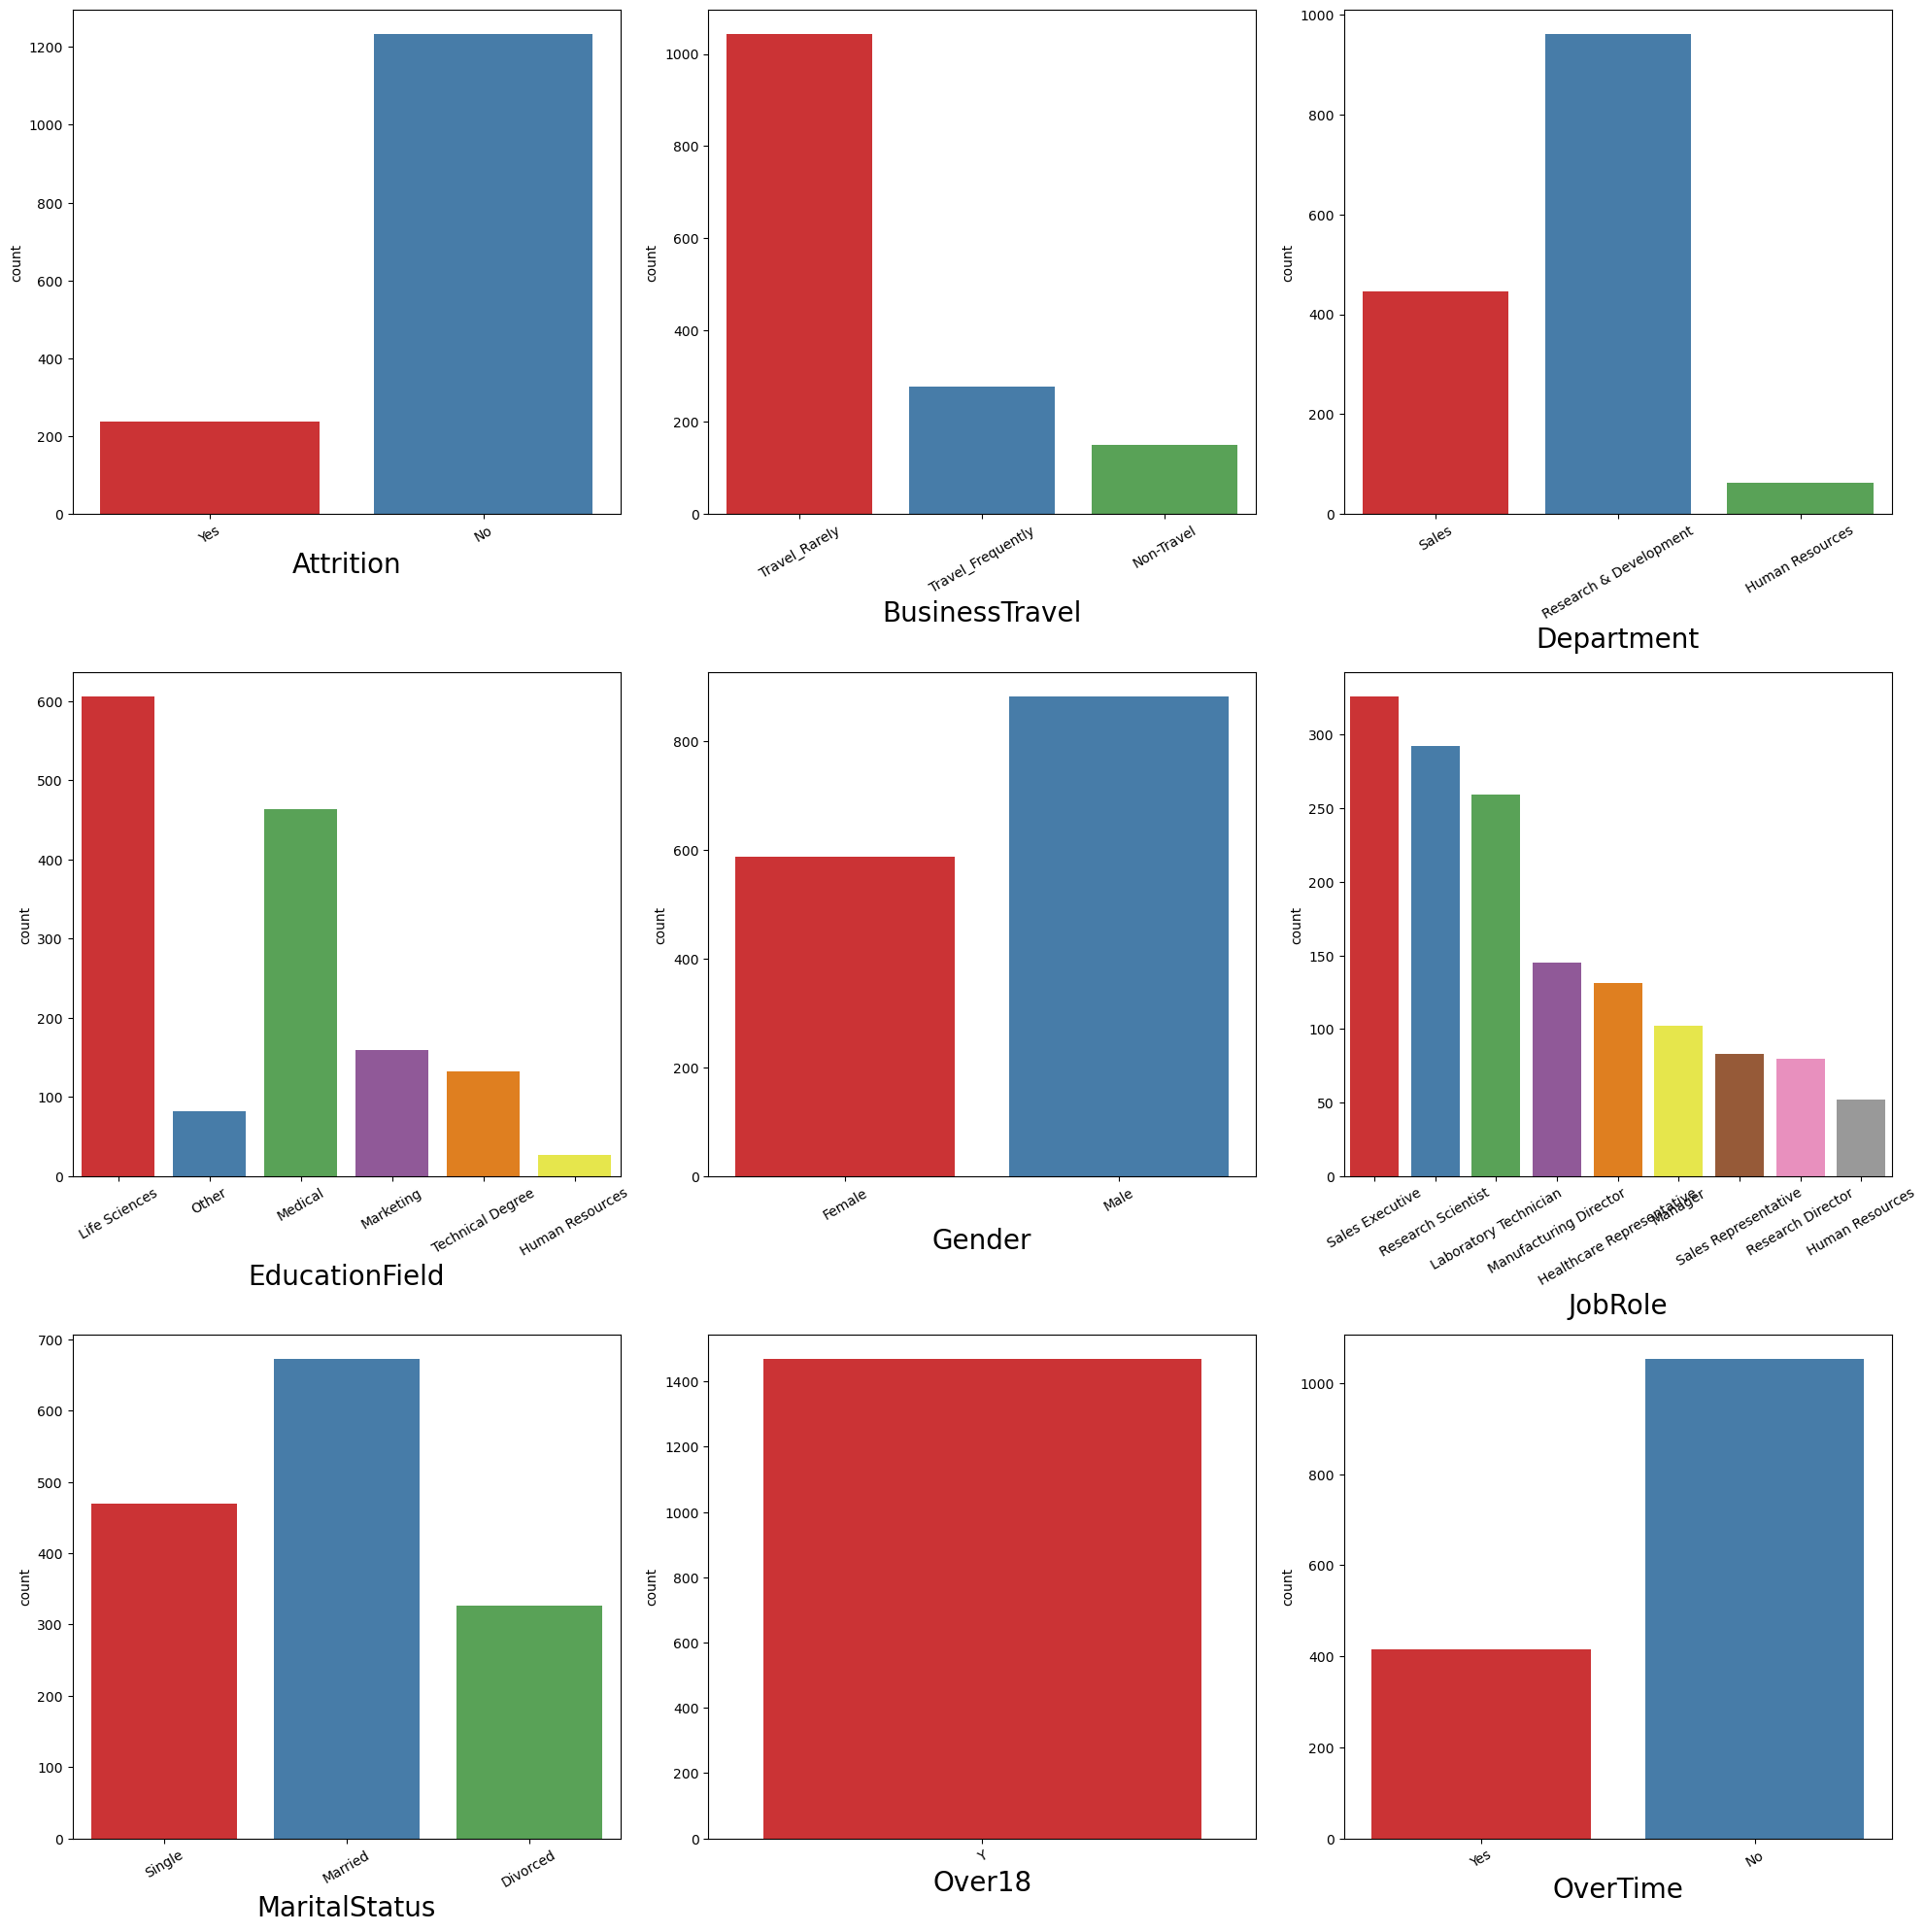

In [15]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data=df, x=i,palette='Set1' )
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Enlisting Value counts & Sub-categories of different Ordinal features available

In [16]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
         'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Education
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


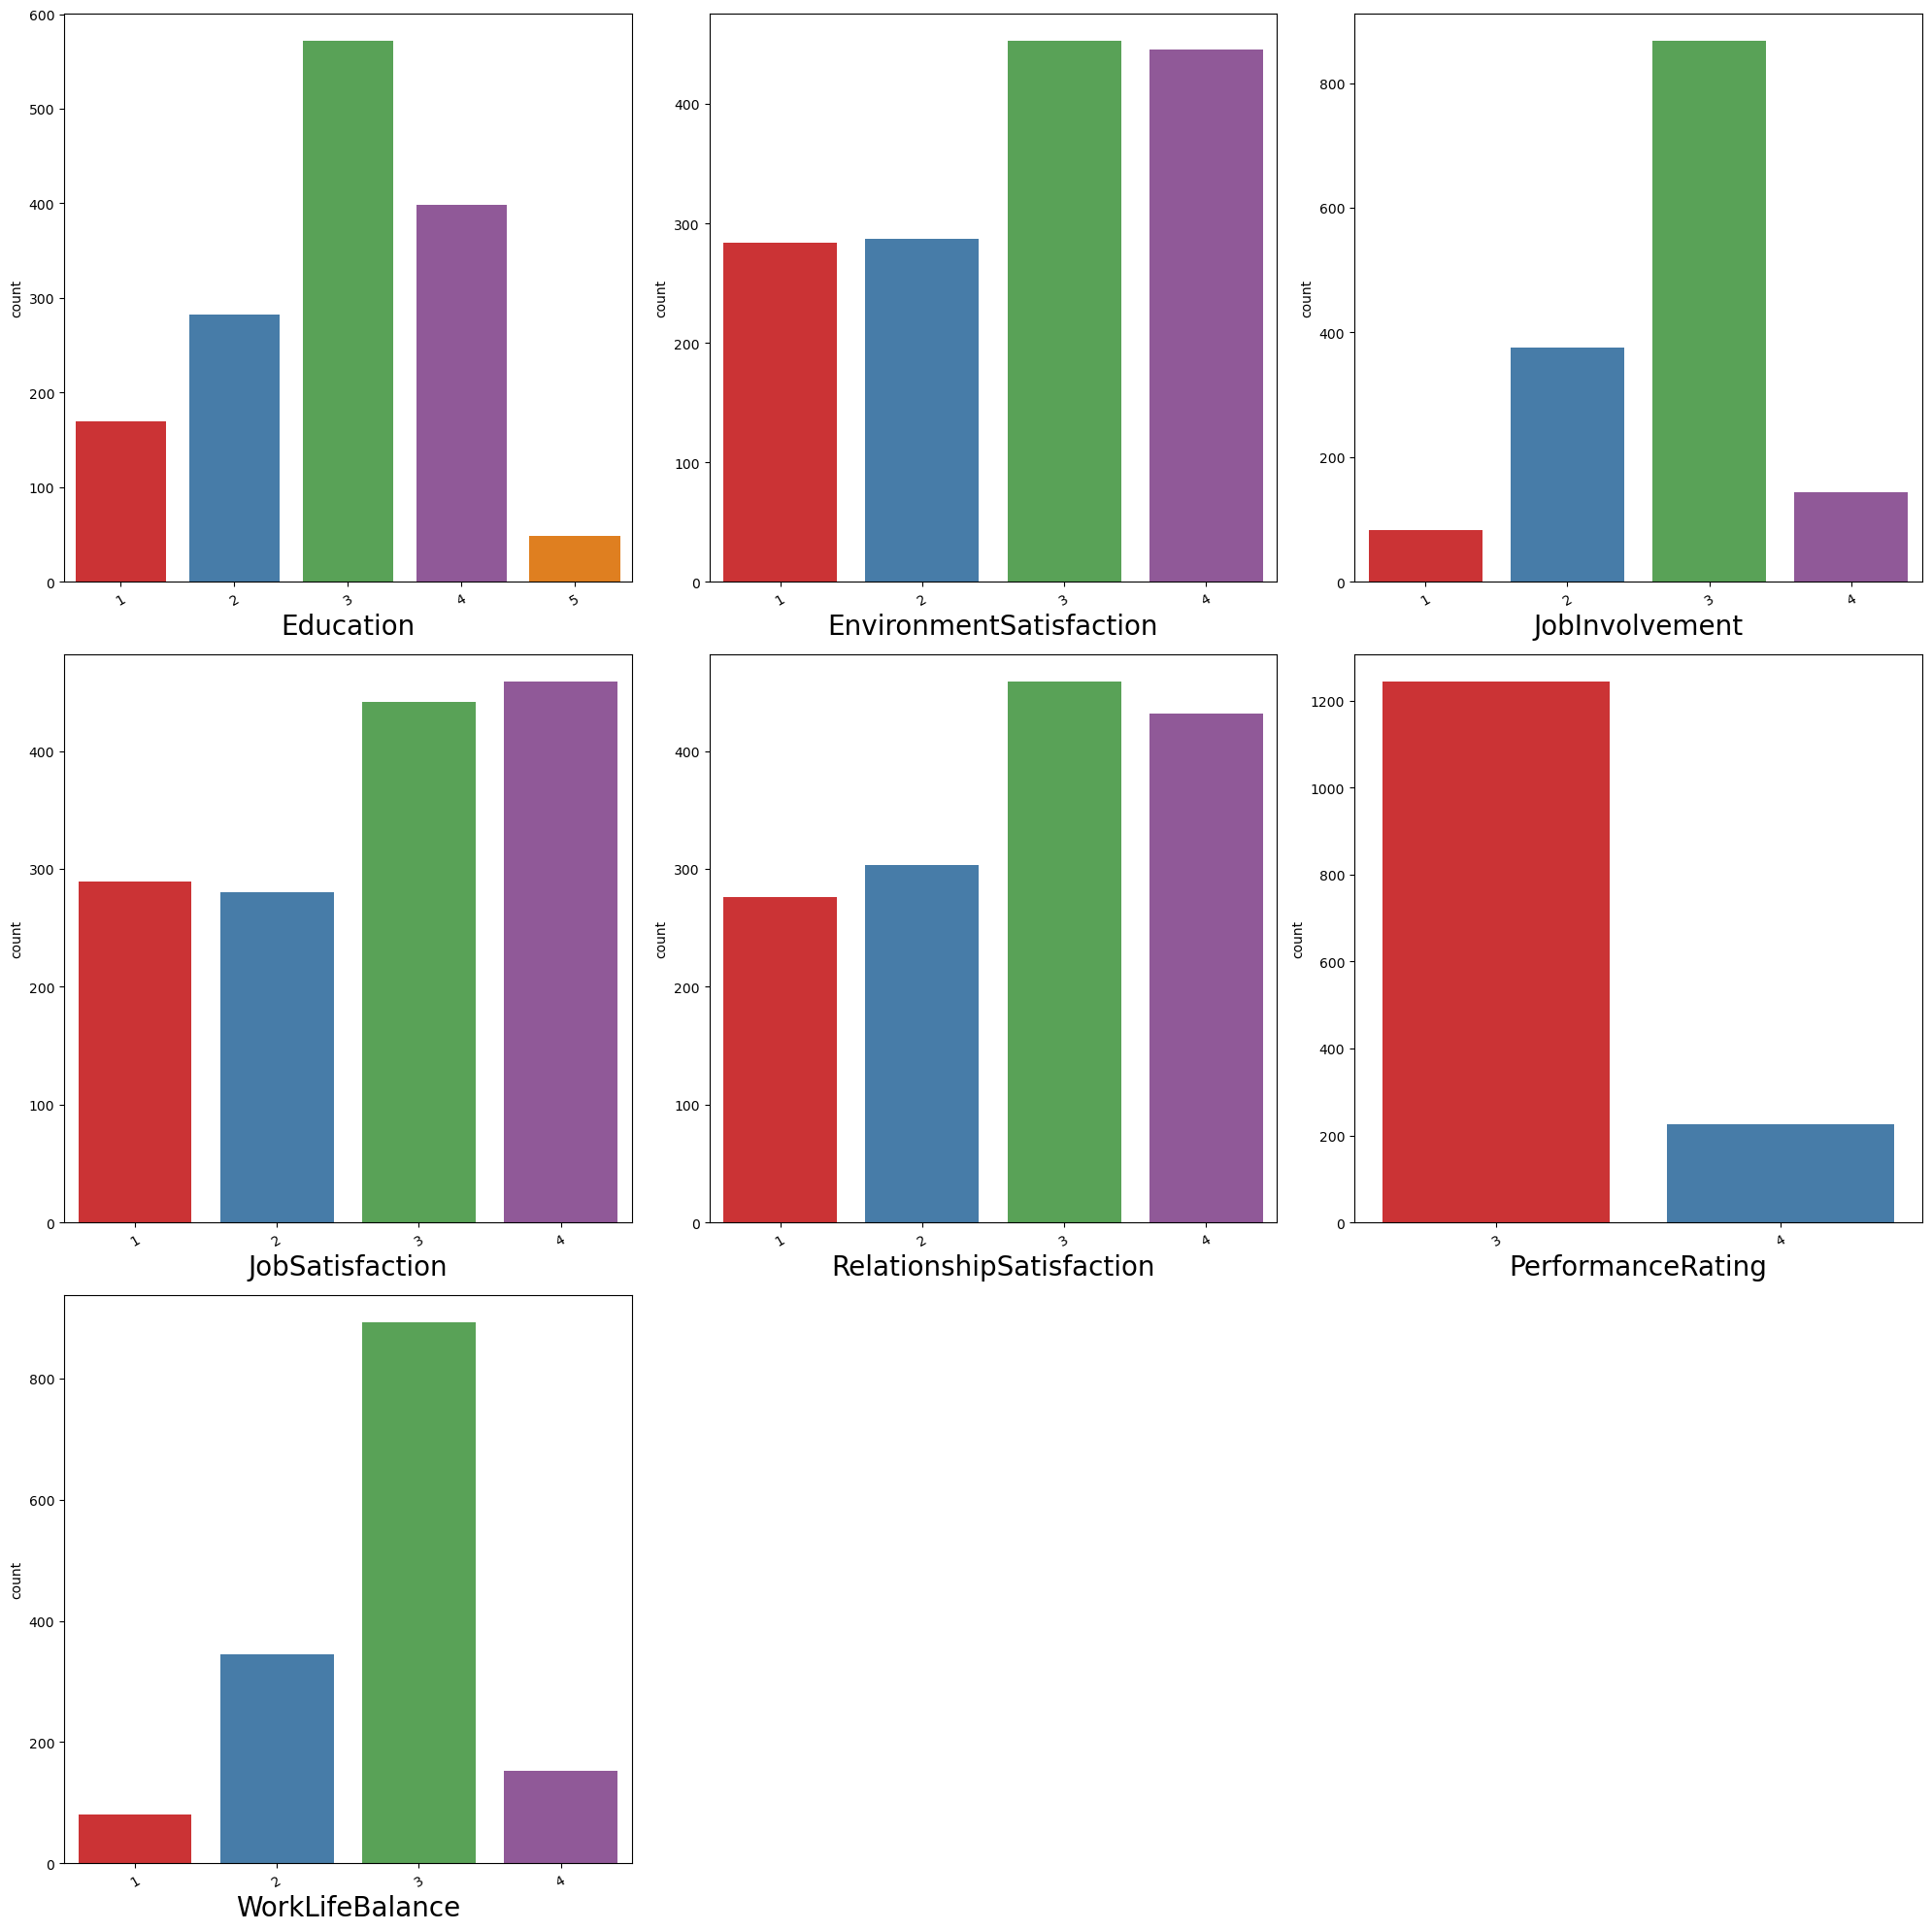

In [17]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data=df, x=i , palette='Set1')
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Education level of Man power available

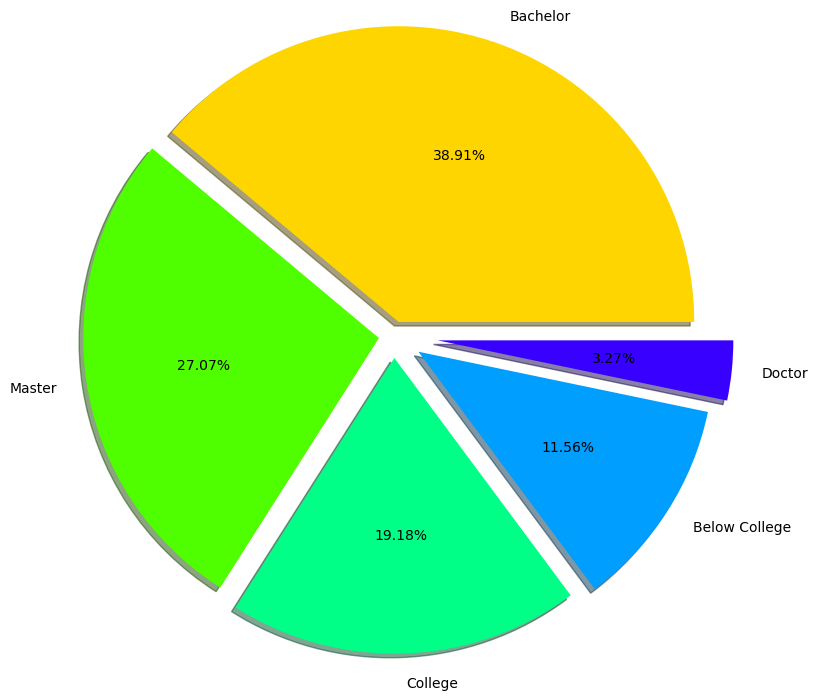

In [18]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()


### Comment:

 . More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.
    
 . 30 % of Employees are highly educated which involves master and doctor degree.

 . 39 % of Employees are graduate.
    
 . Almost 19% Employees are educated upto college & 12% are below college.

### Lets try to gain insight on to which department this Human Resource belong and education need of each department through visualization.

In [19]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

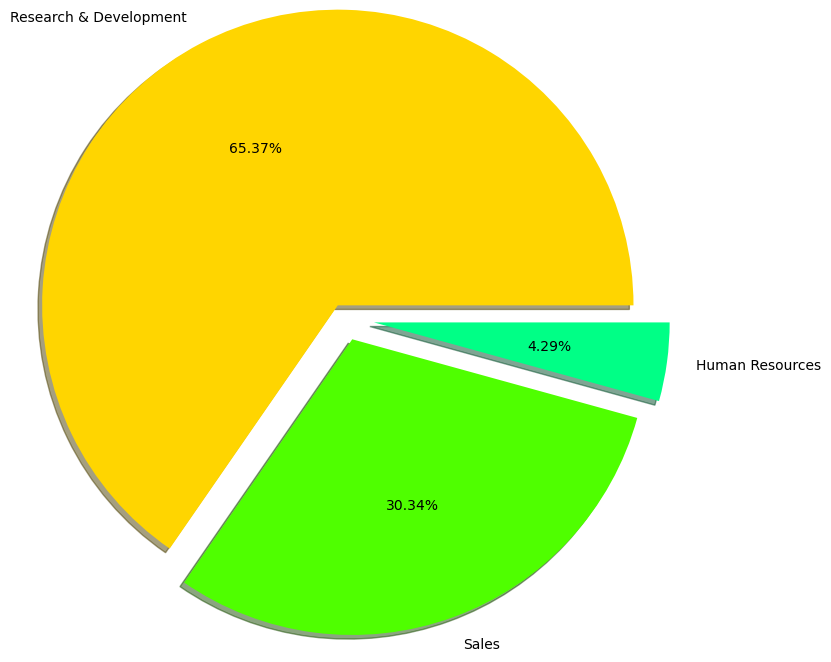

In [20]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [21]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')


Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


## Comment :-

 . 65.37% of Employees belong to Research & Development Department. Out of Total 961 Employee no of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.
    
    
 . Only 63 Employee work in HR department.


In [22]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='summer_r')

## Employee distribution as per education field and level of education

In [23]:
df['EducationField'].value_counts()


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

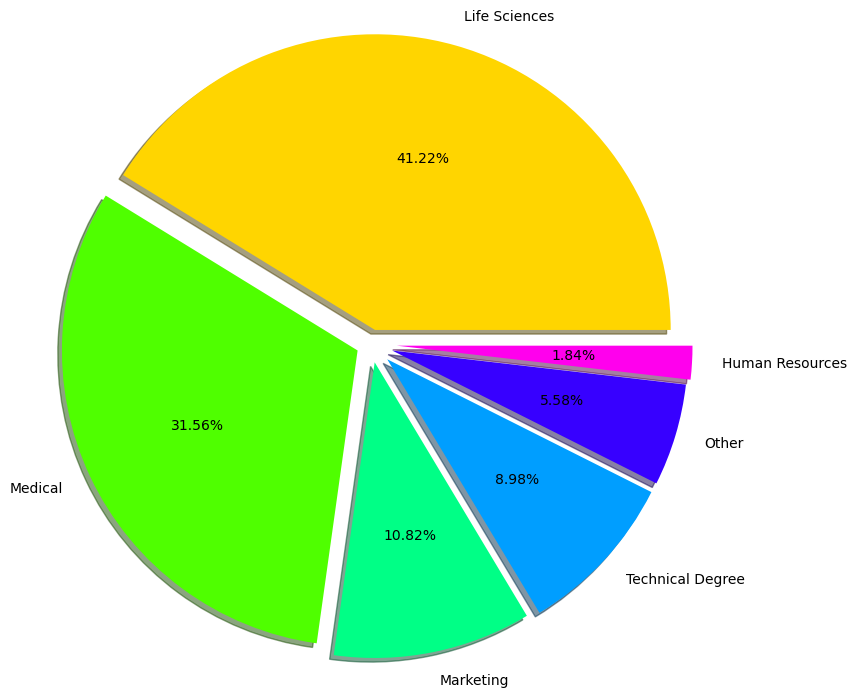

In [24]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [25]:
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [26]:
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


### Comment:

 . 41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.
    
 . There are only 27 people with HR background and We know that 63 people work in HR Department from previous result. This implies that atleast half employee working in HR department do not have HR background. This important as there is more probability of Employees Retention is when they are working in domain of interest or as per their education background. Dissatisfaction with want we doing can be seen as major reason of leaving job.

 . Most of Employees with Techanical degree are Bachelors.
    
 . Most of Employees having Masters and Doctors belong to Life Science and Medical domain.

 . R&D department almost everyone comes from profession or technical background except support staff. Factor like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.
    
 . There are 159 Employee with Marketing background and all work in Sales Department.

 . 50% Employees in sales department have background of Life sciences & Medical. So it will interesting to see attrition rate in these employees.

### We will Analysis Attrition over above insight in next section of Job role.

### Lets work with Job Role

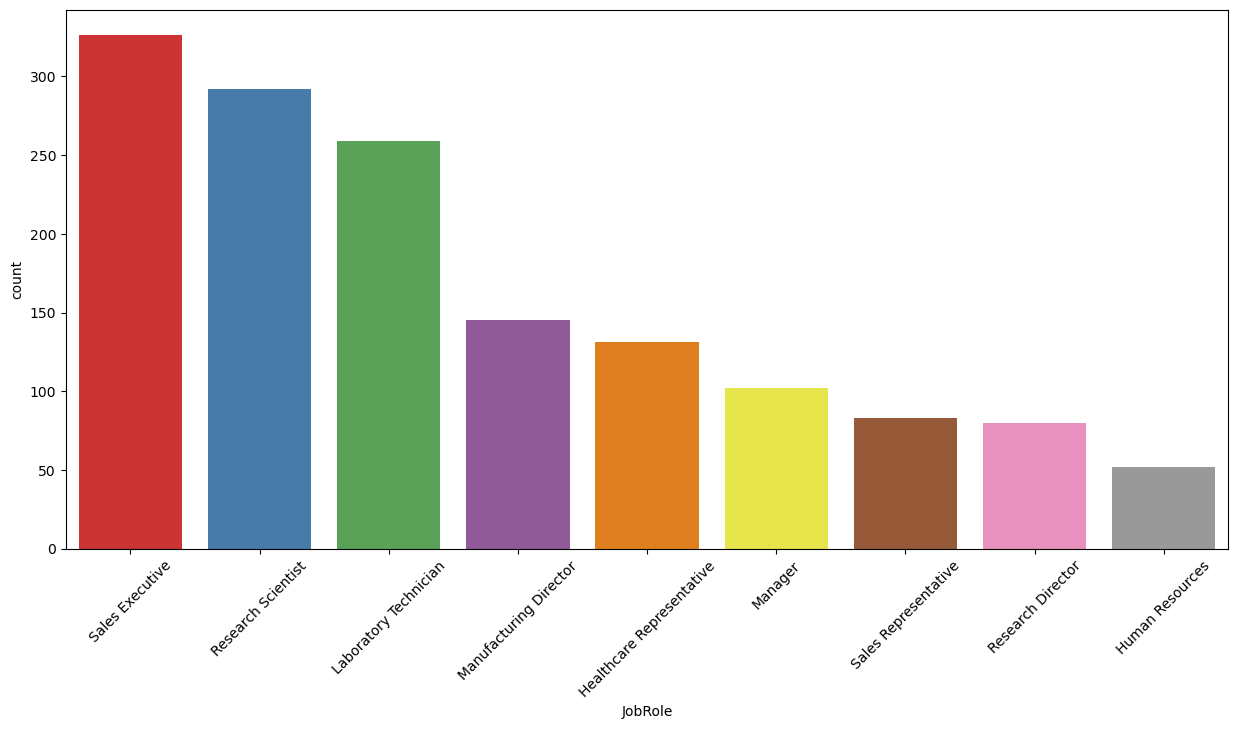

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='JobRole',palette='Set1')
plt.xticks(rotation=45)
plt.show()

### . Before going for Attrition by Job role,

first build matrix of department vs job role which will give us idea about number of employees of different job role across department

In [28]:
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


### Comment:

 . There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.
    
 . Human Resources department has 2 Job role i.e. HR & Manager.

 . There 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.

<Figure size 1200x1000 with 0 Axes>

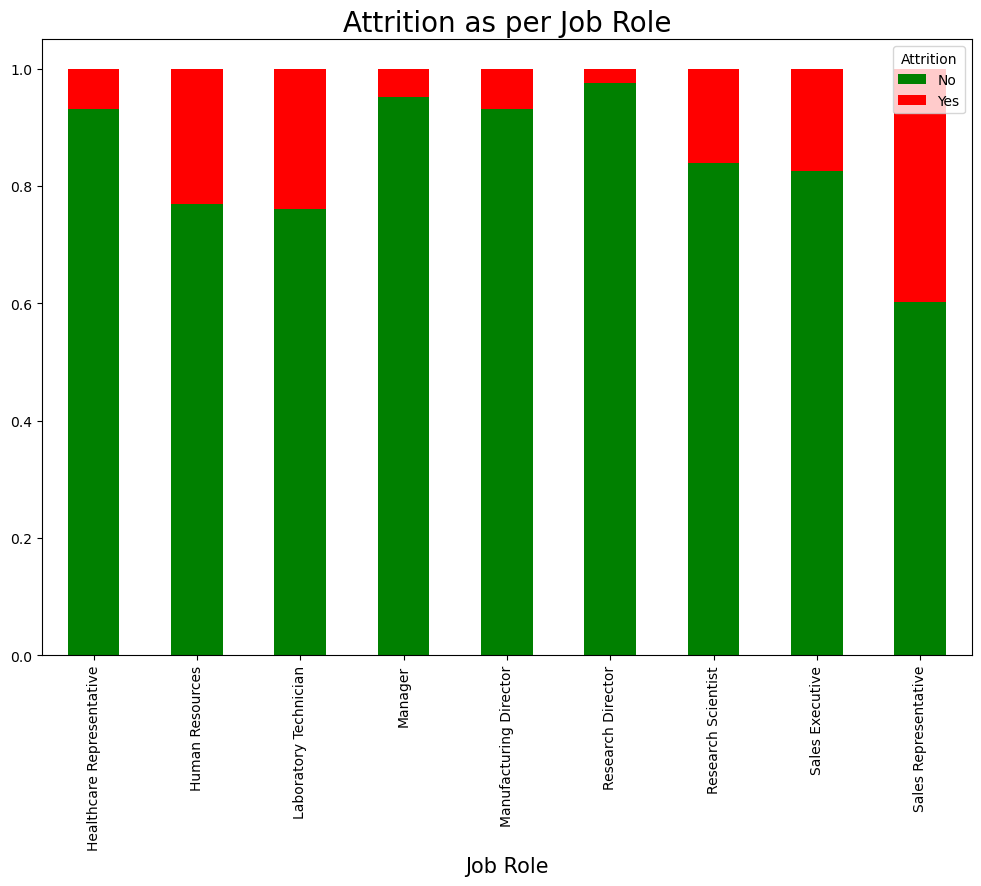

In [29]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

### We all can definitely see Red Signal for different Managers & HR of Respective Job Role in above barplot !!!

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [30]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')

### Comment:

 . Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources. This all job role comes at bottom in corparate hierachy also Salary is comparatively less compare to other job role.
    
 . Monthly Income, Job stastifation, travelling are feature need to dive into for further insights in these job role.

 . At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.
    
 . 16 % arttrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases.

In [31]:
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

### Violinplot of Numeric Variables

In [32]:
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

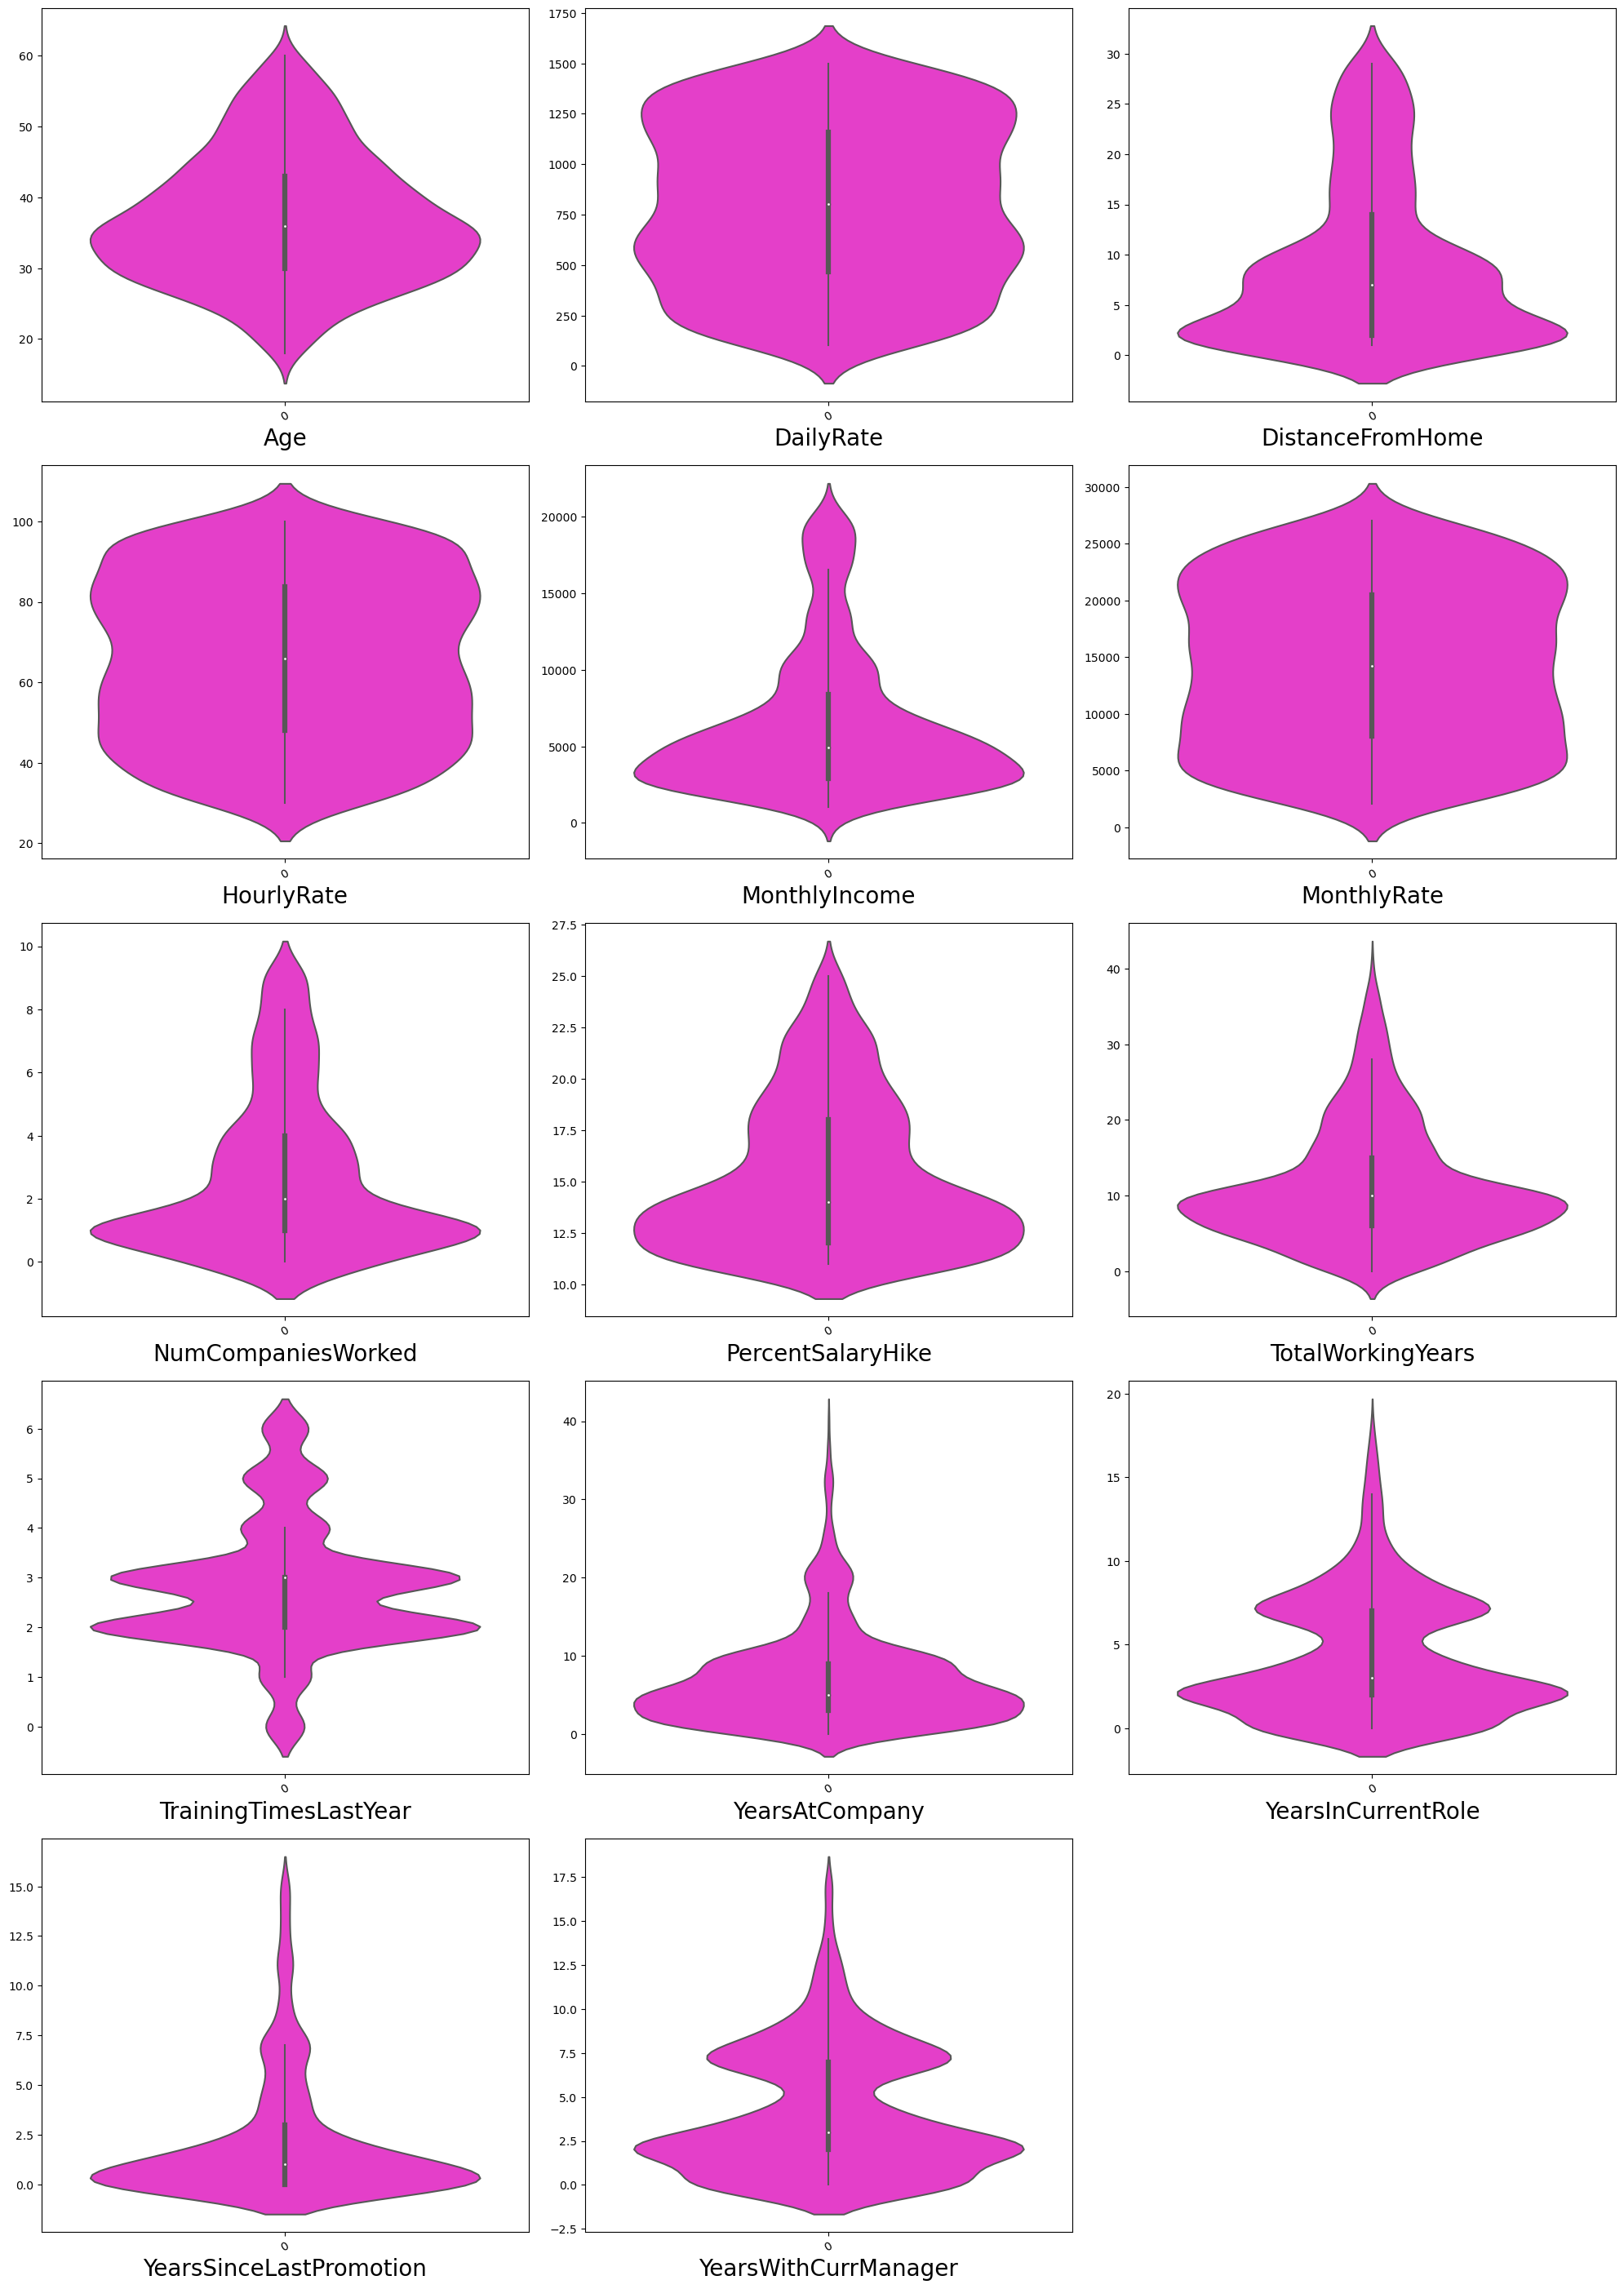

In [33]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Comment:-

 . For Majority of people have spend 3 to 10 years at company.
    
 . Most of people staying company upto 2 years after promotion.

 . Majority of people are are train 2-3 times in last year.If employees leaves job then it loss investment for company.
    
 . Majority of people stay in same role for maximum 4 yrs.

 . Majority of Employees have salary hike of 10 to 15%.

## Age Vs Attrition

<Axes: xlabel='Age', ylabel='count'>

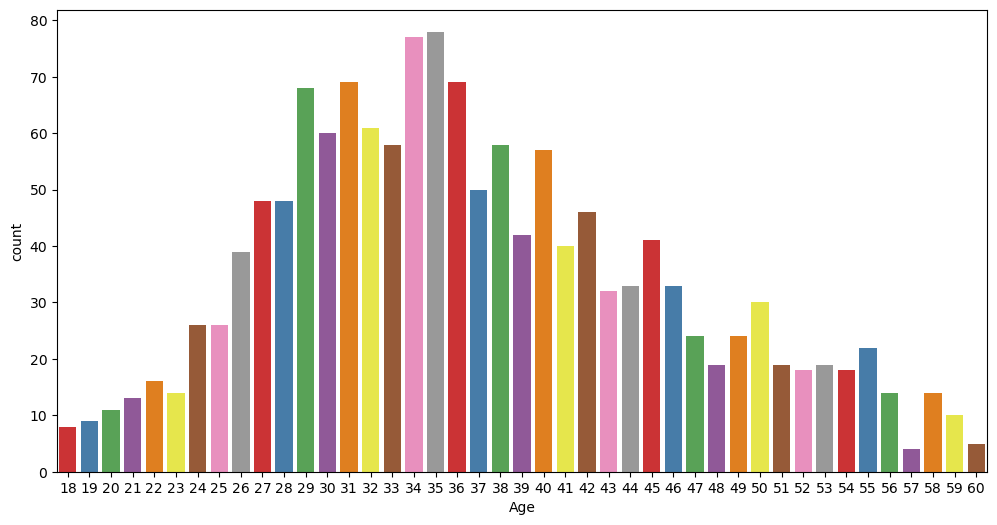

In [34]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df,x='Age',palette='Set1')

<Axes: xlabel='Age', ylabel='count'>

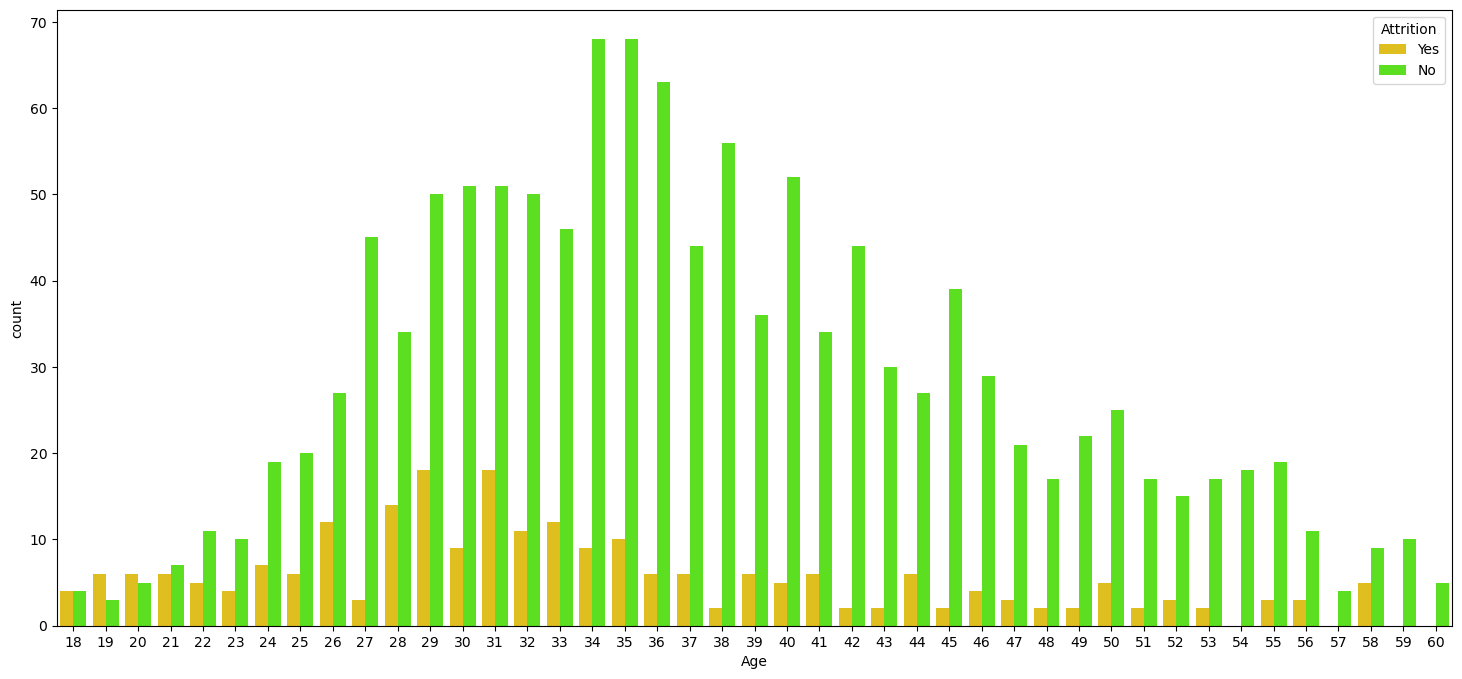

In [35]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

### Comment :-

 1. The Attrition rate is minimum between the Age years of 34 and 35.


 2. The Attrition rate is maximum between the Age years of 29 and 31.

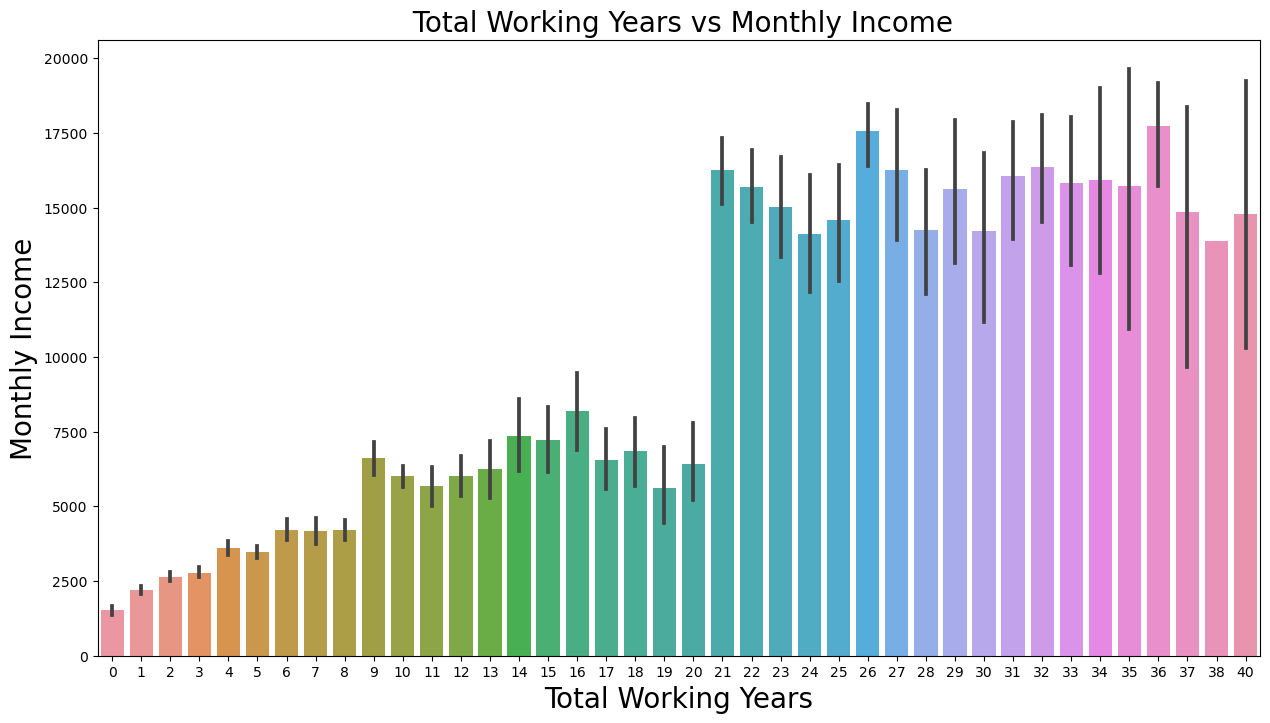

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='TotalWorkingYears',y='MonthlyIncome')
plt.xlabel('Total Working Years',fontsize=20)
plt.ylabel('Monthly Income',fontsize=20)
plt.title(" Total Working Years vs Monthly Income", fontsize=20)
plt.show()

## Comment:-

Monthly Income is highest for the employees with 21 or more number of Total Working Years

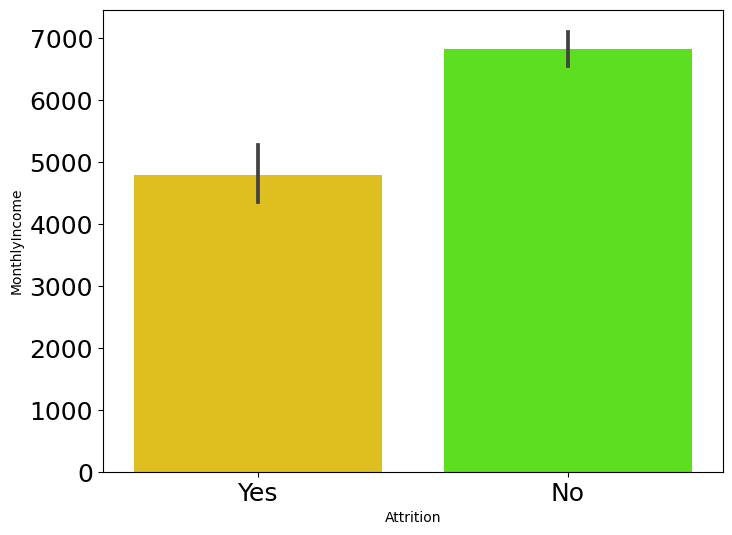

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## Comment:-

The rate of Attrition is high when the employee did not got promoted since 1.8 years.

In [38]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Encoding categorical data

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [41]:
df.shape

(1470, 31)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


## Outliers Detection and Removal

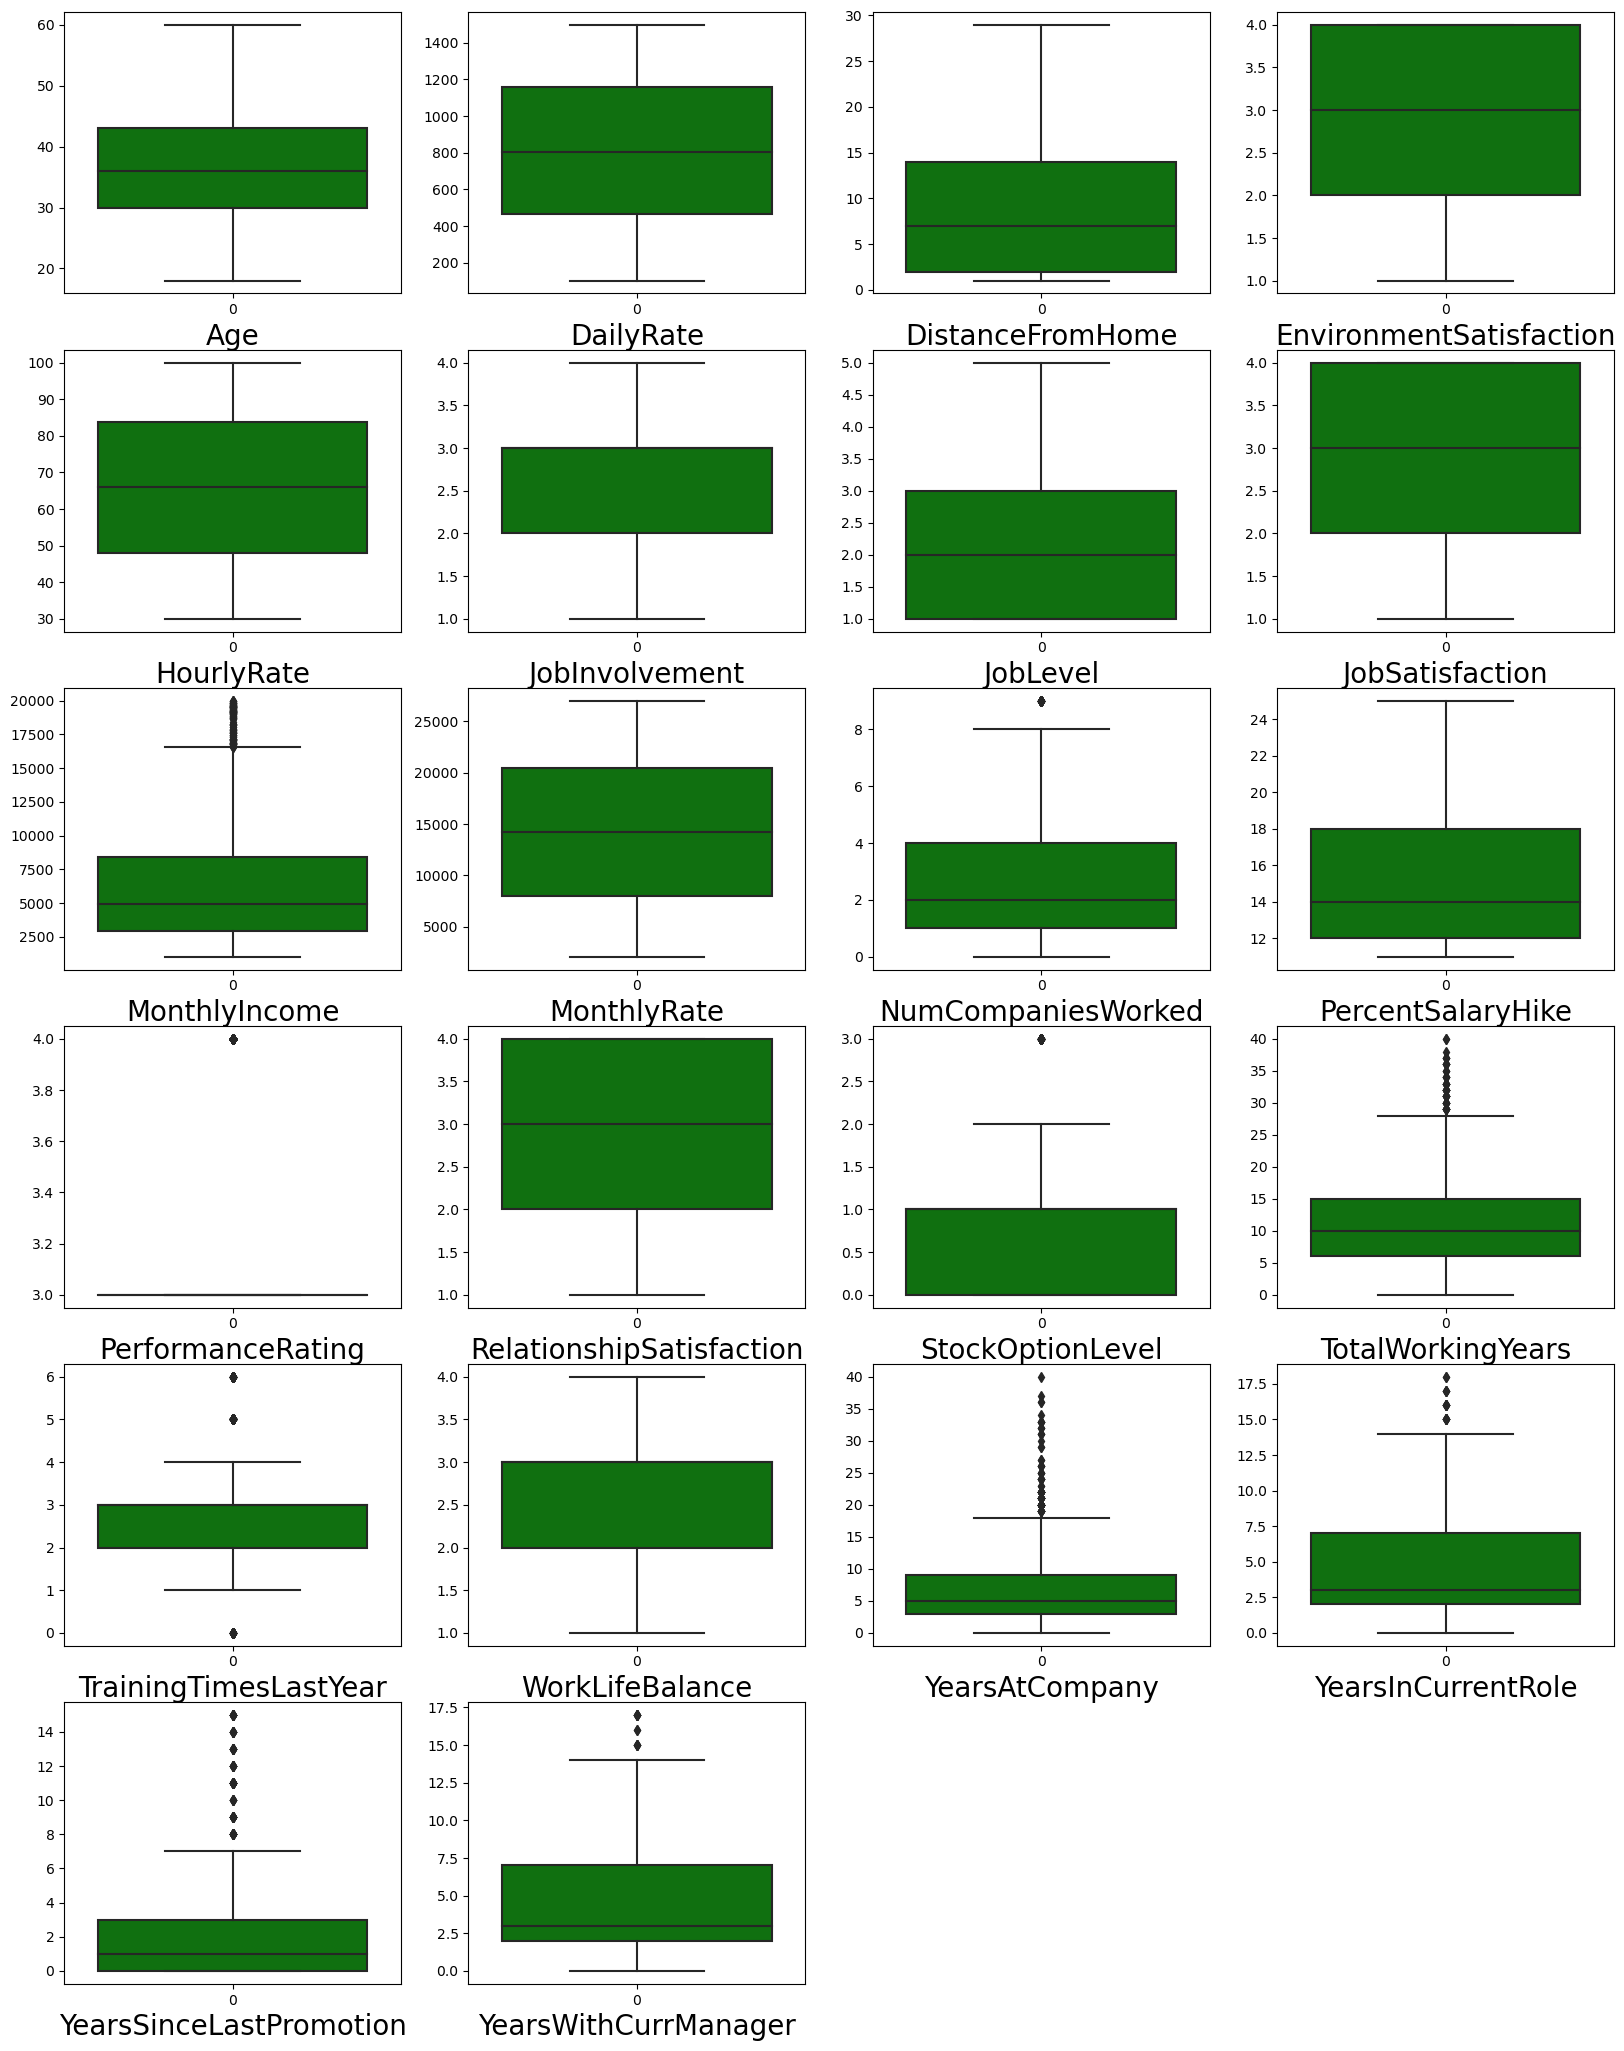

In [43]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


### Features containing outliers

#### "MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [44]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


## Data Loss

In [45]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1470-1387)/1470)*100,'%')

Percentage Data Loss : 5.646258503401361 %


# Feature selection and Engineering

### 1. Skewness of features

In [46]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [47]:
X= df.drop(['Attrition'],axis=1)
Y= df['Attrition']

In [48]:
from sklearn.preprocessing import power_transform
from sklearn.datasets import load_iris 

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

skewness_before = X.skew()
print("Skewness before transformation:")
print(skewness_before)

X_transformed = power_transform(X, method='yeo-johnson')

X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

skewness_after = X_transformed.skew()
print("\nSkewness after transformation:")
print(skewness_after)


Skewness before transformation:
sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

Skewness after transformation:
sepal length (cm)    0.009869
sepal width (cm)     0.000069
petal length (cm)   -0.246515
petal width (cm)    -0.156809
dtype: float64


### Transforming skew data using power transform

### 2. Corrleation

In [49]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,0.014098,-0.039430,0.025465,0.036424,0.453902,-0.112957,0.011763,-0.104372,0.443747,0.026954,0.309209,0.034180,0.005891,-0.000617,0.041744,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,-0.112393,0.036252,-0.001532,-0.133957,-0.171968,0.064283,-0.114206,0.160960,-0.161848,0.014888,0.050314,0.257237,-0.006267,0.010781,-0.052344,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,0.001183,-0.025364,0.025424,0.028261,0.018996,0.000213,-0.032491,0.018687,0.033746,-0.010307,0.018764,0.022378,-0.023004,-0.018274,-0.029660,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,0.033123,-0.005242,0.014279,0.048004,0.022978,-0.015437,0.042698,-0.074113,0.035004,-0.029844,0.032948,0.020294,0.027802,0.000574,0.004516,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,-0.014540,-0.030618,-0.002412,-0.024040,0.126809,0.678627,0.029521,0.052086,0.071876,0.022741,-0.044344,0.014908,-0.022678,-0.039364,-0.037705,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,-0.019279,-0.000819,0.028230,0.010106,0.008498,-0.000537,-0.009284,-0.021816,-0.015040,0.037052,-0.028307,0.026520,0.035864,0.023678,0.007885,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,-0.026223,-0.019166,0.010848,0.041343,0.083065,0.015140,-0.007219,-0.012726,0.072670,-0.018540,0.130812,-0.017166,-0.011344,-0.023487,-0.002393,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,0.047924,0.010676,-0.006539,-0.006876,-0.035795,0.017492,-0.050934,0.012073,-0.030017,-0.023384,0.001983,0.007912,-0.007845,-0.003621,-0.013734,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.019279,-0.026223,0.047924,1.000000,-0.015715,-0.040459,-0.012720,0.013835,-0.022354,-0.011186,-0.012453,0.003011,0.032916,0.015298,0.059355,-0.026797,-0.025299,0.018414,0.013330,-0.001669,-0.019318,0.032492,0.006621,0.038837,0.027943,0.001606
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,-0.000819,-0.019166,0.010676,-0.015715,1.000000,0.004768,0.011939,-0.056970,-0.036831,0.036302,-0.056786,-0.047362,-0.045850,-0.030920,-0.051558,0.005443,-0.010757,0.041458,0.026438,-0.058555,-0.040211,0.000134,-0.045123,-0.025536,-0.028162,-0.036280


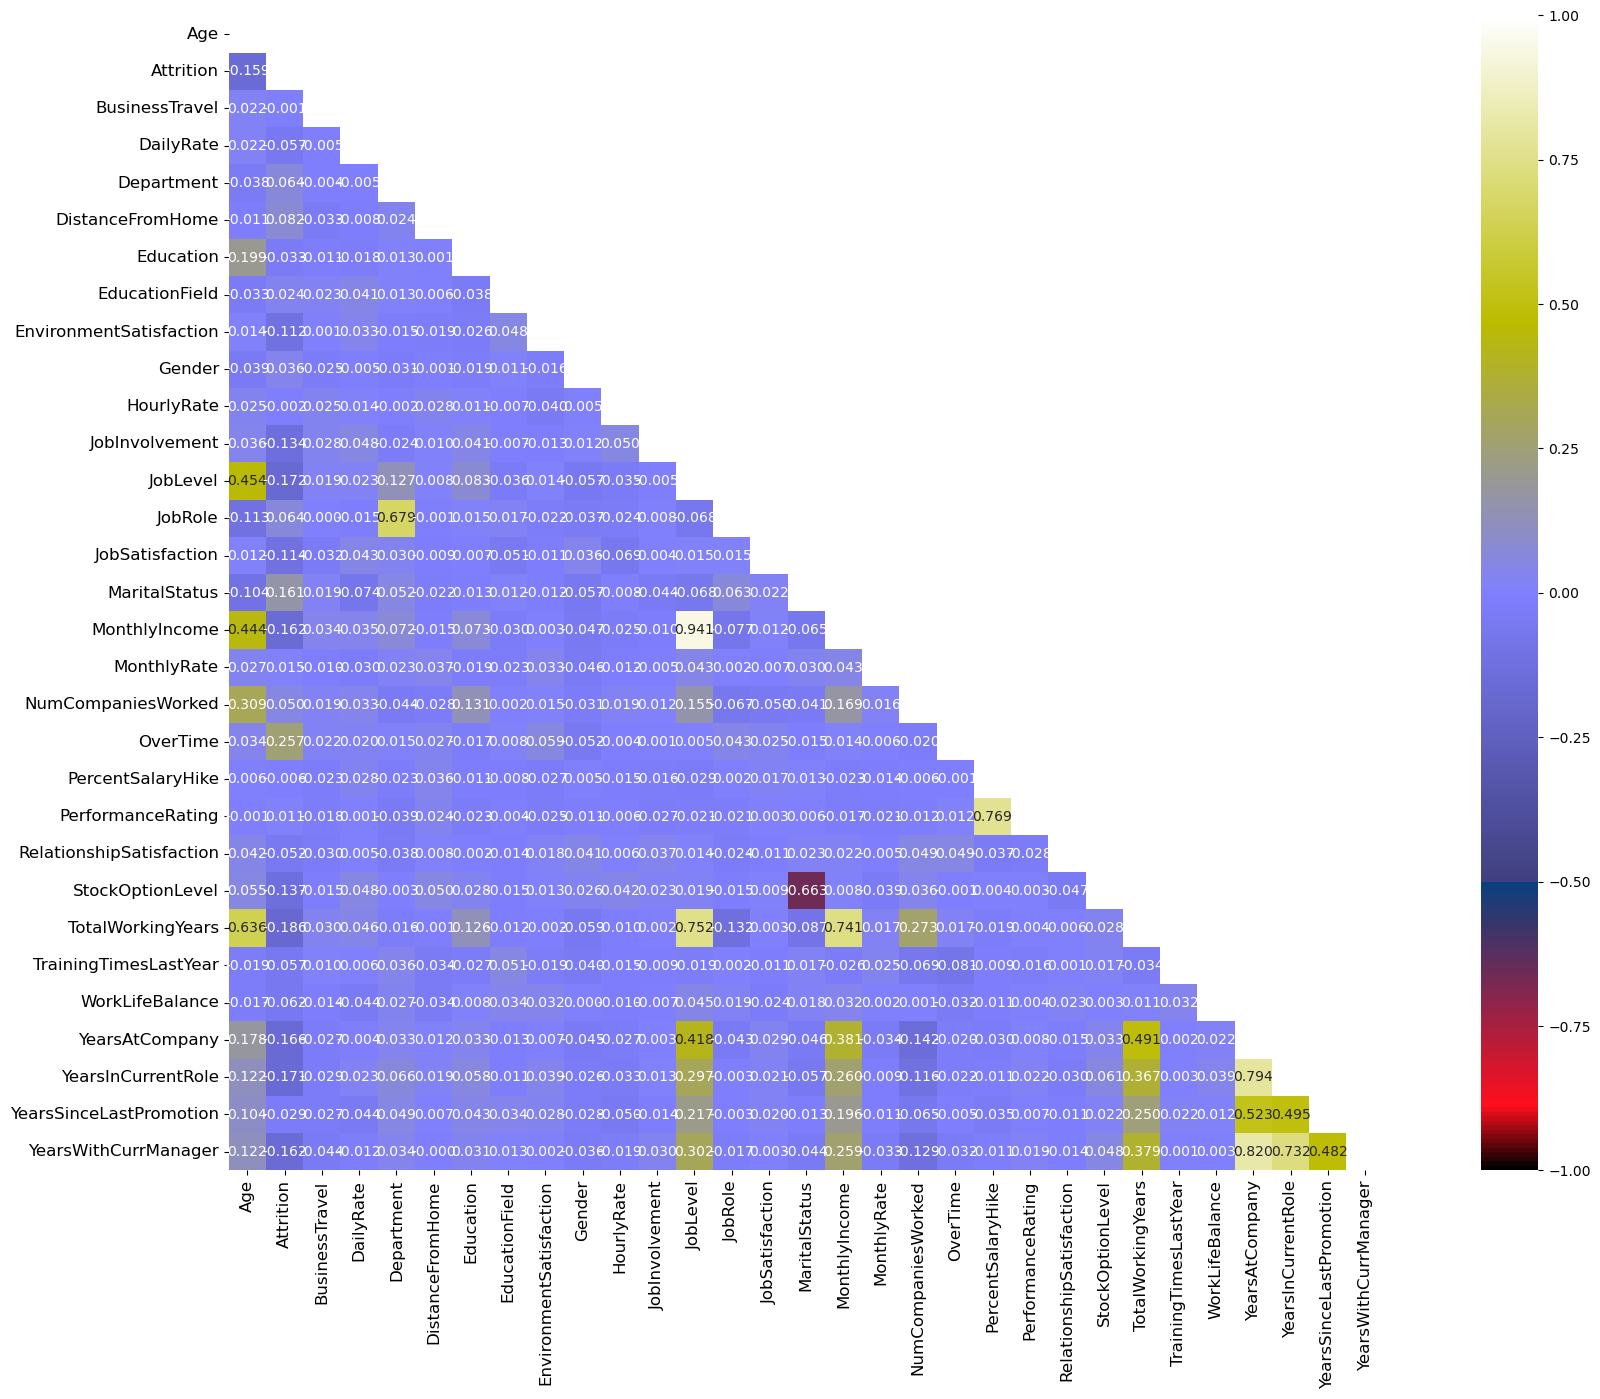

In [50]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

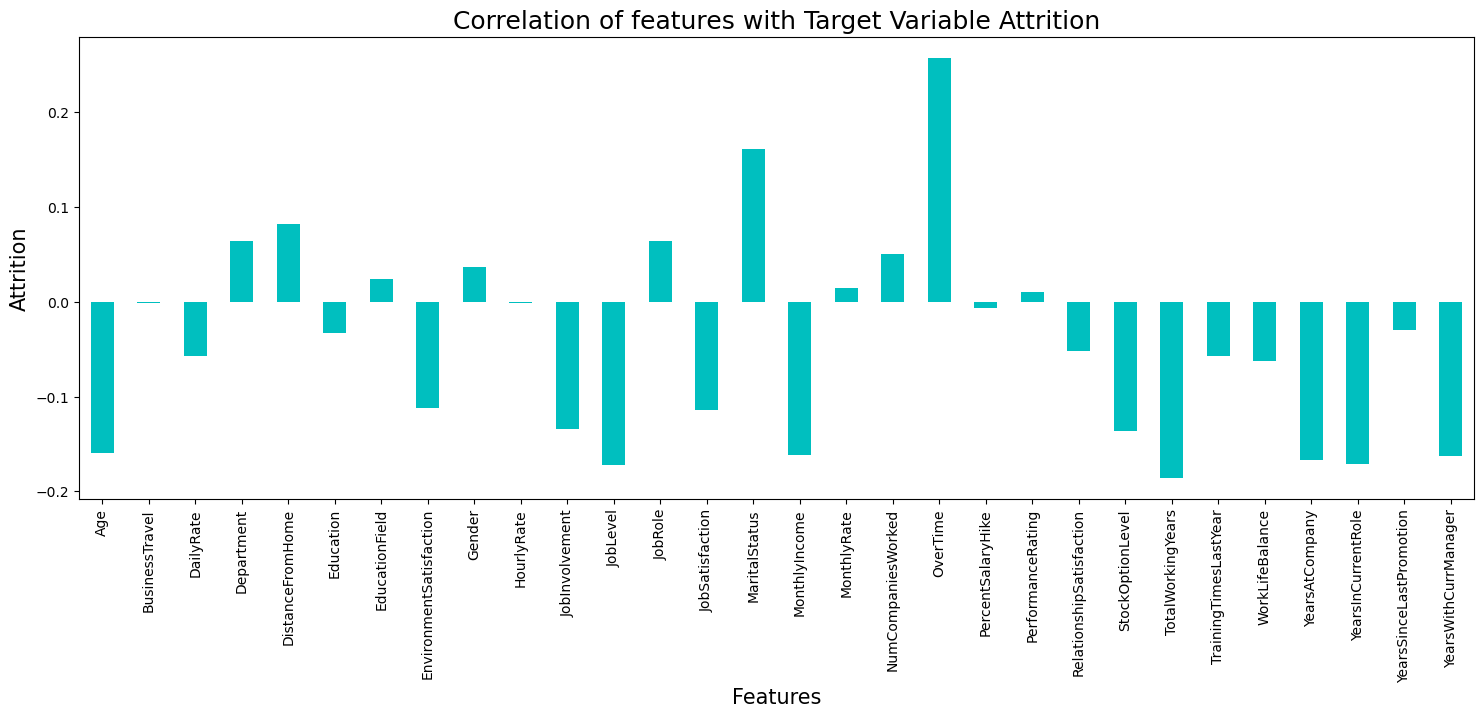

In [51]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

# Comment:-

 . Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.
    
 . JobLevel is highly positively correlated with the MonthlyIncome.

 . PercentSalaryHike is highly positively correlated with the column PerformanceRating.
    

# 3. Checking Multicollinearity between features using variance_inflation_factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,30.994586,Age
1,1.520532,Attrition
2,6.669133,BusinessTravel
3,5.041636,DailyRate
4,13.932479,Department
5,2.342119,DistanceFromHome
6,9.343006,Education
7,3.892970,EducationField
8,7.283358,EnvironmentSatisfaction
9,2.547848,Gender


## Commet:-

 . We can see that multicollinerity is within permissible limit of 10.

### Balancing using SMOTE

As data is Imbalanced in nature we will need to balance target variable.

In [53]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0


In [54]:
!pip install imbalanced-learn==0.7.0  


  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0


In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
num_samples = min(X.shape[0], Y.shape[0])
X = X[:num_samples]
Y = Y[:num_samples]


In [71]:
assert X.shape[0] == Y.shape[0], "Number of samples in X and Y must be consistent"

oversample = SMOTE(random_state=42)
X_resampled, Y_resampled = oversample.fit_resample(X, Y)


In [72]:
Y.value_counts()

Attrition
0    126
1     24
Name: count, dtype: int64

# Standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

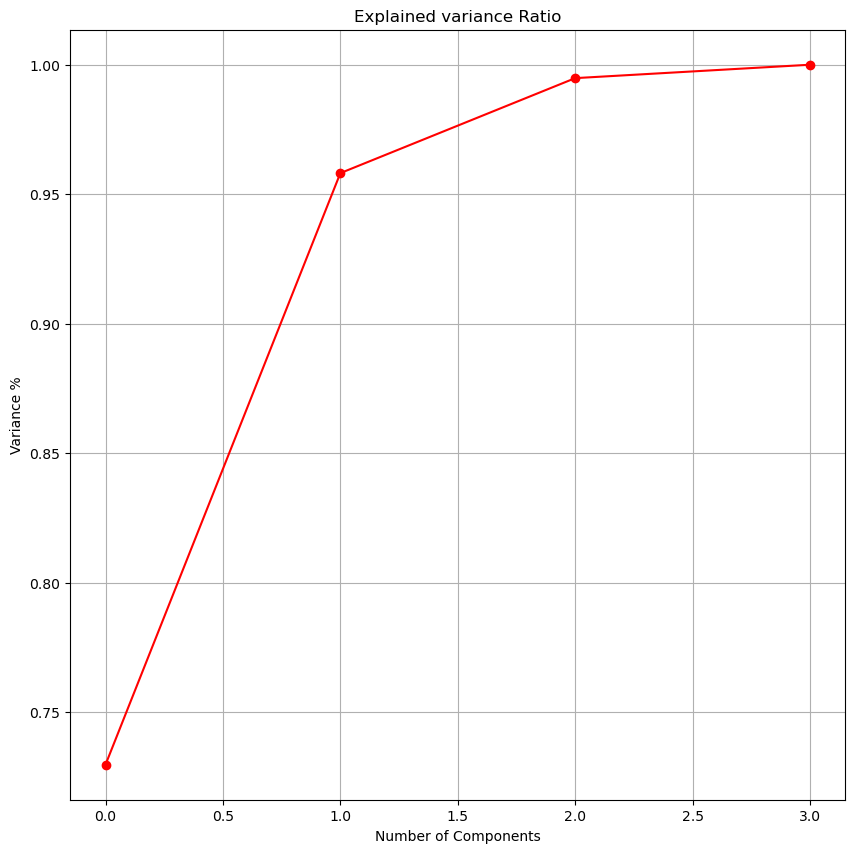

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [86]:
x=df1.drop(columns= ['Attrition'])
y=df1['Attrition']

In [91]:
pca_new = PCA(n_components=4)
x_new = pca_new.fit_transform(X_scale)

In [92]:
principle_x=pd.DataFrame(x_new,columns=np.arange(4))

# Machine Learning Model Building

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [95]:
print("Shape of principle_x:", principle_x.shape)
print("Shape of Y:", Y.shape)


Shape of principle_x: (150, 4)
Shape of Y: (150,)


In [96]:
principle_x = principle_x.iloc[:Y.shape[0], :]

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (100, 4)
Training target vector size: (100,)
Test feature matrix size: (50, 4)
Test target vector size: (50,)


# Finding best Random state

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.92 on Random_state 42


In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.86


Confusion matrix of Logistics Regression : 
 [[43  0]
 [ 7  0]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        43
           1       0.00      0.00      0.00         7

    accuracy                           0.86        50
   macro avg       0.43      0.50      0.46        50
weighted avg       0.74      0.86      0.80        50



# Finding Optimal value of n_neighbors for KNN

In [100]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5291502622129182
RMSE value for k=  2 is: 0.4
RMSE value for k=  3 is: 0.4
RMSE value for k=  4 is: 0.4
RMSE value for k=  5 is: 0.4242640687119285
RMSE value for k=  6 is: 0.37416573867739417
RMSE value for k=  7 is: 0.34641016151377546
RMSE value for k=  8 is: 0.37416573867739417
RMSE value for k=  9 is: 0.37416573867739417
RMSE value for k=  10 is: 0.37416573867739417
RMSE value for k=  11 is: 0.37416573867739417
RMSE value for k=  12 is: 0.37416573867739417
RMSE value for k=  13 is: 0.37416573867739417
RMSE value for k=  14 is: 0.37416573867739417
RMSE value for k=  15 is: 0.37416573867739417
RMSE value for k=  16 is: 0.37416573867739417
RMSE value for k=  17 is: 0.37416573867739417
RMSE value for k=  18 is: 0.37416573867739417
RMSE value for k=  19 is: 0.37416573867739417
RMSE value for k=  20 is: 0.37416573867739417
RMSE value for k=  21 is: 0.37416573867739417
RMSE value for k=  22 is: 0.37416573867739417
RMSE value for k=  23 is: 0.37416573867739417
R

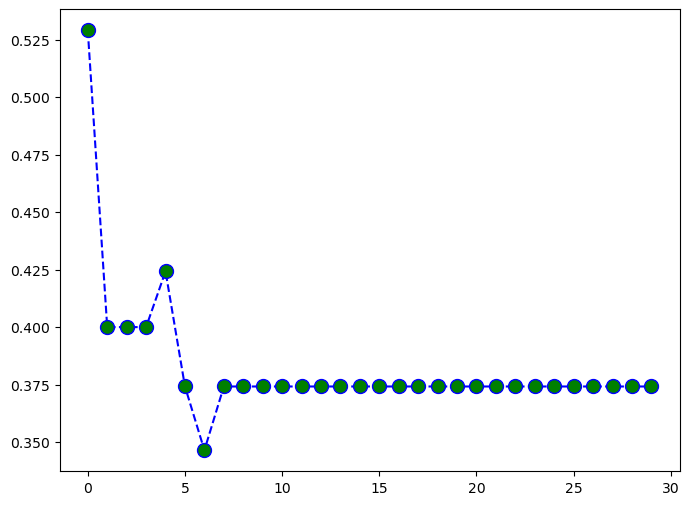

In [101]:
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Applying other classification algorithm

In [102]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.86


Confusion matrix : 
 [[43  0]
 [ 7  0]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        43
           1       0.00      0.00      0.00         7

    accuracy                           0.86        50
   macro avg       0.43      0.50      0.46        50
weighted avg       0.74      0.86      0.80        50



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.84


Confusion matrix : 
 [[41  2]
 [ 6  1]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.33      0.14      0.20         7

    accuracy                           0.84        50
   macro avg       0.60      0.55      0.56        50
weighted avg       0.80      0.84      0.81        50



Classification ML Algorithm Evaluat

### We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

# 

# Cross Validation:-

In [103]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.83333333 0.83333333 0.83333333 0.83333333 0.86666667]
Mean Score : 0.8400000000000001
Std deviation : 0.01333333333333333




Cross Validation Score SVC() :

Score : [0.83333333 0.83333333 0.83333333 0.83333333 0.86666667]
Mean Score : 0.8400000000000001
Std deviation : 0.01333333333333333




Cross Validation Score GaussianNB() :

Score : [0.16666667 0.9        0.83333333 0.83333333 0.86666667]
Mean Score : 0.72
Std deviation : 0.2777688887466621




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7        0.63333333 0.8        0.73333333 0.56666667]
Mean Score : 0.6866666666666668
Std deviation : 0.08055363982396382




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.83333333 0.83333333 0.83333333 0.83333333 0.86666667]
Mean Score : 0.8400000000000001
Std deviation : 0.01333333333333333




Cross Validation Score RandomForestClassifier() :

Score : [0.76666667 0.83333333 0.83333333 0.7

#### On basis of maximum score in crossvalidation of Random Forest Classifier. we will apply Hyperparameter tuning on Random Forest model

# Hyper Parameter Tuning : GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [106]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [107]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 15}

# Final Model

In [108]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.86


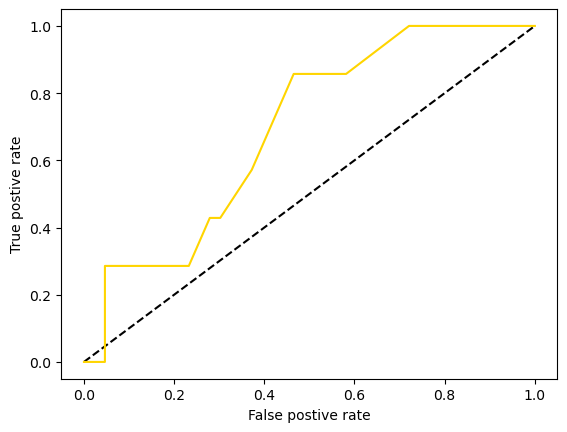

Auc Score :
 0.6196013289036545


In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [110]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']